In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

data = pd.read_csv('data/BTC-USD.csv')

In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800
...,...,...,...,...,...,...,...
3465,2024-06-27,60811.226563,62293.863281,60585.332031,61604.800781,61604.800781,21231745045
3466,2024-06-28,61612.804688,62126.097656,59985.402344,60320.136719,60320.136719,24952866877
3467,2024-06-29,60319.875000,61097.621094,60300.964844,60887.378906,60887.378906,12652903396
3468,2024-06-30,60888.445313,62892.828125,60632.949219,62678.292969,62678.292969,17333226409


In [5]:
data = data[['Date', 'Close']]
data

,Date,Close
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001
3,2015-01-04,264.195007
4,2015-01-05,274.473999
...,...,...
3465,2024-06-27,61604.800781
3466,2024-06-28,60320.136719
3467,2024-06-29,60887.378906
3468,2024-06-30,62678.292969


In [6]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

/var/folders/_r/67_fq5891yg4z02j5rm0_8xc0000gn/T/ipykernel_64049/1819287010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Date'] = pd.to_datetime(data['Date'])


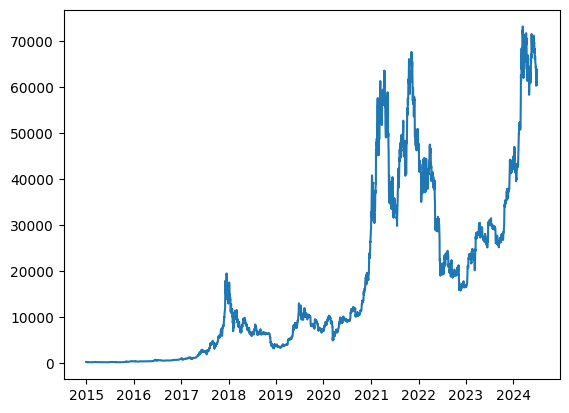

In [11]:
data['Date'] = pd.to_datetime(data['Date'])

plt.plot(data['Date'], data['Close'])

In [97]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)

    df.set_index('Date', inplace=True)

    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df

lookback = 30
shifted_df = prepare_dataframe_for_lstm(data, lookback)
shifted_df

,Close,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7),Close(t-8),Close(t-9),...,Close(t-21),Close(t-22),Close(t-23),Close(t-24),Close(t-25),Close(t-26),Close(t-27),Close(t-28),Close(t-29),Close(t-30)
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-31,217.464005,226.425003,233.513000,233.914993,263.475006,273.472992,253.718002,247.847000,232.878998,233.406006,...,274.795990,290.407990,283.348999,294.337006,286.188995,274.473999,264.195007,281.082001,315.032013,314.248993
2015-02-01,226.972000,217.464005,226.425003,233.513000,233.914993,263.475006,273.472992,253.718002,247.847000,232.878998,...,265.660004,274.795990,290.407990,283.348999,294.337006,286.188995,274.473999,264.195007,281.082001,315.032013
2015-02-02,238.229004,226.972000,217.464005,226.425003,233.513000,233.914993,263.475006,273.472992,253.718002,247.847000,...,267.795990,265.660004,274.795990,290.407990,283.348999,294.337006,286.188995,274.473999,264.195007,281.082001
2015-02-03,227.268005,238.229004,226.972000,217.464005,226.425003,233.513000,233.914993,263.475006,273.472992,253.718002,...,225.860992,267.795990,265.660004,274.795990,290.407990,283.348999,294.337006,286.188995,274.473999,264.195007
2015-02-04,226.852997,227.268005,238.229004,226.972000,217.464005,226.425003,233.513000,233.914993,263.475006,273.472992,...,178.102997,225.860992,267.795990,265.660004,274.795990,290.407990,283.348999,294.337006,286.188995,274.473999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27,61604.800781,60811.277344,61804.640625,60277.414063,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875,65140.746094,...,70757.164063,71082.820313,70567.765625,68804.781250,67751.601563,67706.937500,67491.414063,68364.992188,67578.093750,68296.218750
2024-06-28,60320.136719,61604.800781,60811.277344,61804.640625,60277.414063,63180.796875,64252.578125,64096.199219,64828.656250,64960.296875,...,69342.585938,70757.164063,71082.820313,70567.765625,68804.781250,67751.601563,67706.937500,67491.414063,68364.992188,67578.093750
2024-06-29,60887.378906,60320.136719,61604.800781,60811.277344,61804.640625,60277.414063,63180.796875,64252.578125,64096.199219,64828.656250,...,69305.773438,69342.585938,70757.164063,71082.820313,70567.765625,68804.781250,67751.601563,67706.937500,67491.414063,68364.992188


In [98]:
shifted_df_as_np = shifted_df.to_numpy()
shifted_df_as_np

array([[  217.464005,   226.425003,   233.513   , ...,   281.082001,
          315.032013,   314.248993],
       [  226.972   ,   217.464005,   226.425003, ...,   264.195007,
          281.082001,   315.032013],
       [  238.229004,   226.972   ,   217.464005, ...,   274.473999,
          264.195007,   281.082001],
       ...,
       [60887.378906, 60320.136719, 61604.800781, ..., 67706.9375  ,
        67491.414063, 68364.992188],
       [62678.292969, 60887.378906, 60320.136719, ..., 67751.601563,
        67706.9375  , 67491.414063],
       [63735.539063, 62678.292969, 60887.378906, ..., 68804.78125 ,
        67751.601563, 67706.9375  ]])

In [99]:
#scaled the data into a range between -1 and 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df_as_np)

shifted_df_as_np

array([[-0.99980874, -0.9995628 , -0.99936827, ..., -0.997175  ,
        -0.99624365, -0.99626513],
       [-0.99954779, -0.99980874, -0.9995628 , ..., -0.99763825,
        -0.997175  , -0.99624365],
       [-0.99923884, -0.99954779, -0.99980874, ..., -0.99735627,
        -0.99763825, -0.997175  ],
       ...,
       [ 0.66527739,  0.64970943,  0.68496704, ...,  0.85250578,
         0.84659336,  0.87055807],
       [ 0.71442904,  0.66527739,  0.64970943, ...,  0.85373104,
         0.85250578,  0.84659336],
       [ 0.74344516,  0.71442904,  0.66527739, ...,  0.88262272,
         0.85373104,  0.85250578]])

In [100]:
x = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

#want to flip t-1 t-2 etc to go in reverse, t-7 t-6 becuase for the LSTM model you want to go from the oldest to most recent data
x = dc(np.flip(x, axis=1))

In [101]:
split_index = int(len(x) * .95)
split_index

3268

In [102]:
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((3268, 30), (172, 30), (3268,), (172,))

In [103]:
x_train = x_train.reshape((-1, lookback, 1))
x_test = x_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

x_train.shape, x_test.shape, y_train.shape, y_test.shape


((3268, 30, 1), (172, 30, 1), (3268, 1), (172, 1))

In [104]:
#convert to PyTorch Tensors
x_train = torch.tensor(x_train).float()
y_train = torch.tensor(y_train).float()
x_test = torch.tensor(x_test).float()
y_test = torch.tensor(y_test).float()

x_train.shape, x_test.shape, y_train.shape, y_test.shape


(torch.Size([3268, 30, 1]),
 torch.Size([172, 30, 1]),
 torch.Size([3268, 1]),
 torch.Size([172, 1]))

In [105]:
#make dataset
from torch.utils.data import Dataset

class TimeSeriesDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, i):
        return self.x[i], self.y[i]

train_dataset = TimeSeriesDataset(x_train, y_train)
test_dataset = TimeSeriesDataset(x_test, y_test)


In [106]:
#make dataloader
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [107]:
for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 30, 1]) torch.Size([16, 1])


In [108]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [109]:
def train_one_epoch():
    model.train(True)
    running_loss = 0.0
    print(f'Epoch: {epoch+1}')
    for batch_index, batch in enumerate(train_loader):

        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output=model(x_batch)
        loss= loss_function(output, y_batch)
        running_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch_index % 100 == 99:
            avg_loss_across_batches = running_loss / 100
            print(f'Batch: {batch_index+1}, Loss: {avg_loss_across_batches}')

            running_loss = 0.0
    print()

In [110]:
def validate_one_epoch():
    model.train(False)
    running_loss=0.0

    for batch_index,batch in enumerate(test_loader):
        x_batch, y_batch = batch[0], batch[1]

        with torch.inference_mode():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss +=loss.item()

    avg_loss_across_batches = running_loss/ len(test_loader)

    print(f'Val loss: {avg_loss_across_batches:.5f}')
    print("********************************")
    print()

In [111]:
learning_rate = 0.001
num_epochs = 100
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range (num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch: 100, Loss: 0.2481906743347645
Batch: 200, Loss: 0.08898861359804869

Val loss: 0.37259
********************************

Epoch: 2
Batch: 100, Loss: 0.029502786668017505
Batch: 200, Loss: 0.007829730377998202

Val loss: 0.13887
********************************

Epoch: 3
Batch: 100, Loss: 0.004811896594474092
Batch: 200, Loss: 0.00417917531740386

Val loss: 0.09925
********************************

Epoch: 4
Batch: 100, Loss: 0.0034703732034540736
Batch: 200, Loss: 0.0021446294721681625

Val loss: 0.06901
********************************

Epoch: 5
Batch: 100, Loss: 0.001839025425724685
Batch: 200, Loss: 0.0017568043821665925

Val loss: 0.04782
********************************

Epoch: 6
Batch: 100, Loss: 0.001291277276322944
Batch: 200, Loss: 0.0012084497093746904

Val loss: 0.03102
********************************

Epoch: 7
Batch: 100, Loss: 0.0010186587243515533
Batch: 200, Loss: 0.0010067145893117412

Val loss: 0.02348
********************************

Epoch: 8
Batch: 10

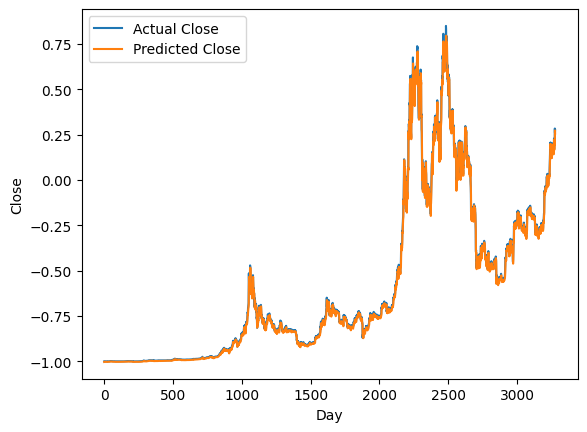

In [90]:
with torch.inference_mode():
    predicted = model(x_train).numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [91]:
train_predictions = predicted.flatten()
#need to do inverse transform
dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dc(dummies[:, 0])
train_predictions

array([  119.25831603,   130.31704418,   137.37968831, ...,
       43654.15252842, 46578.18710128, 45955.72209001])

In [92]:

#need to do inverse transform
dummies = np.zeros((x_train.shape[0], lookback+1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dc(dummies[:, 0])
new_y_train

array([  226.89631372,   233.40515273,   232.87958082, ...,
       46970.50373494, 46139.73089978, 46627.77763514])

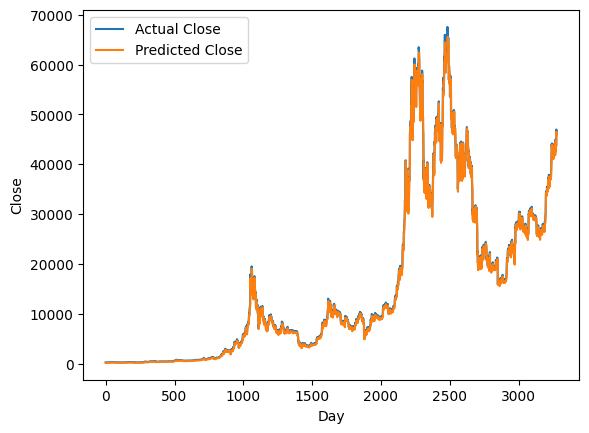

In [93]:
with torch.inference_mode():
    predicted = model(x_train).numpy()

plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()


In [94]:
test_predictions = model(x_test).detach().numpy().flatten()
dummies = np.zeros((x_test.shape[0], lookback+1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dc(dummies[:, 0])
test_predictions

array([46352.50499908, 46118.28018143, 42667.90379204, 42442.76137837,
       41440.97352183, 42128.22504512, 42830.39781581, 42465.96581294,
       40971.80502575, 41254.71800069, 41341.14851992, 41235.04597407,
       39197.48400084, 39449.63147246, 39731.44878198, 39614.76964421,
       41488.82337018, 41873.62345669, 41777.72721346, 42990.17059324,
       42710.25359542, 42309.06739268, 42768.79731207, 42902.49346954,
       42712.60238066, 42294.38504162, 42347.29514853, 42776.27911066,
       44009.80943485, 45026.02445774, 46837.79899722, 47520.94367548,
       48032.34578445, 49601.69919048, 49507.53385973, 51390.33010536,
       51644.08795541, 51856.9912759 , 51419.26262231, 51782.29056632,
       51503.94594068, 51929.23786868, 51569.76730816, 51050.13739252,
       50475.52114371, 51184.52852112, 51403.17621238, 53898.72959128,
       56337.15634311, 60930.30742804, 60566.93308436, 61504.46651615,
       61340.90071659, 62168.90235435, 65904.34178562, 63486.93899644,
      

In [95]:
dummies = np.zeros((x_test.shape[0], lookback+1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dc(dummies[:, 0])
new_y_test

array([46368.58597955, 42853.16789342, 42842.38281016, 41796.26936904,
       42511.96855833, 43154.94553398, 42742.65228089, 41262.05863327,
       41618.40616727, 41665.58602001, 41545.78494162, 39507.36728517,
       39845.55082562, 40077.07421447, 39933.80863027, 41816.87091954,
       42120.05479075, 42035.59353738, 43288.24588368, 42952.60957532,
       42582.60531563, 43075.77366246, 43185.85926161, 42992.25007717,
       42583.58207584, 42658.66773428, 43084.67200769, 44318.22242088,
       45301.5663951 , 47147.19905944, 47771.2777068 , 48293.91771616,
       49958.22263904, 49742.4417037 , 51826.6948781 , 51938.55482542,
       52160.20283737, 51662.99659967, 52122.54734681, 51779.14473605,
       52284.87522904, 51839.17938296, 51304.97244782, 50731.94920315,
       51571.10186991, 51733.23863508, 54522.4021149 , 57085.37095131,
       62504.78841796, 61198.3838552 , 62440.63389531, 62029.84731791,
       63167.37172373, 68330.41433967, 63801.19842712, 66106.80425074,
      

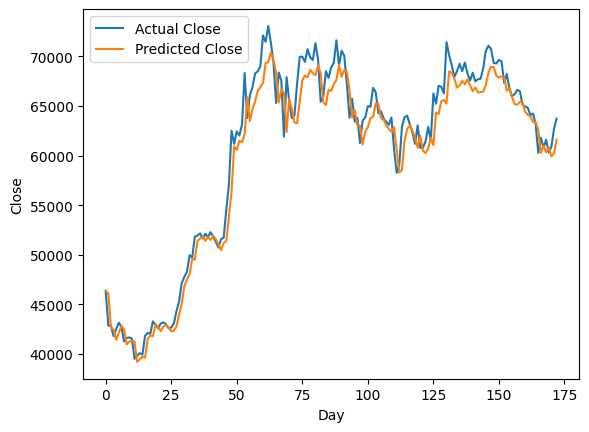

In [96]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
